In [44]:
# Here are some imports which will be used in the code in the rest of the lab

# Jupyter notebook specific 
from IPython.display import Image
from IPython.core.display import HTML 
from IPython.display import display_html
from IPython.display import display
from IPython.display import Math
from IPython.display import Latex
from IPython.display import HTML   

# Imports used for the code in CS 237
# @Author: Kai Bernardini (kaidb@bu.edu)
# Due Date: TBD
import numpy as np                # arrays and functions which operate on array
import matplotlib.pyplot as plt   # normal plotting
import seaborn as sns             # Fancy plotting 
import pandas as pd               # Data input and manipulation
import matplotlib.pylab as plab
from numpy.random import seed, randint, uniform, shuffle
from collections import Counter

import sys # For system level commands. 

plt.style.use('seaborn') # pretty plots 
plab.rcParams['figure.figsize'] = (10.0, 10.0)

from scipy.integrate import odeint
# You do not need any more imports 
%matplotlib inline

In [45]:
def sigmoid(x):
    return 1. / (1. + np.exp(-x))

In [46]:
def s_lin(x):
    return np.log(x+1)  + 5

In [47]:
def lin(x):
    return 2*x + 5

In [48]:
def poly(x):
    return x**3 + x**2 + 1


In [49]:
def poly_e(x):
    #return x**3 + x**2 + 1
    return x**5 + x**2 + 5

In [50]:
EXAMPLE = True

# What exactly is meant by information storage?
- Intuitively, it appears to be some notion of signal preserving. 
- The sum of the component input signals should be similar to the distributed activity of the cells. 

# Example 1: Signal with additive noise
- Assume there is a system of 3 off center on surround cells.
- Assume the input to cell $i$ is $\sin(s) + \epsilon_i$ for $\epsilon_i \sim N(0,\sigma)$ iid for $i=1,2,3$

In [51]:
if EXAMPLE:
    np.random.seed(12345)

    # The gaussian noise added to the observations 

    tmp = np.sin(np.linspace(0,50) * np.pi)
    mu, sigma = 0, 3 # mean and standard deviation
    print(tmp.shape)

    s = np.random.normal(mu, sigma, (3,tmp.shape[0]))
    z = (s + tmp) / 3
    x = np.array([i for i in range(len(z[0]))])
    #plt.figure(figsize=(15,8))
    #plt.plot(x,z)

(50,)


In [32]:
#plt.plot(x, np.sum(z, axis=1) )

# Example 2: 

In [33]:
if not EXAMPLE:
    np.random.seed(1234)
    # Situation 1
    z = np.cos(np.random.uniform(0,1, (3,50)) * 2 * np.pi) + 1
    x = np.array([i for i in range(len(z[0]))])
    print(x.shape, z.shape)

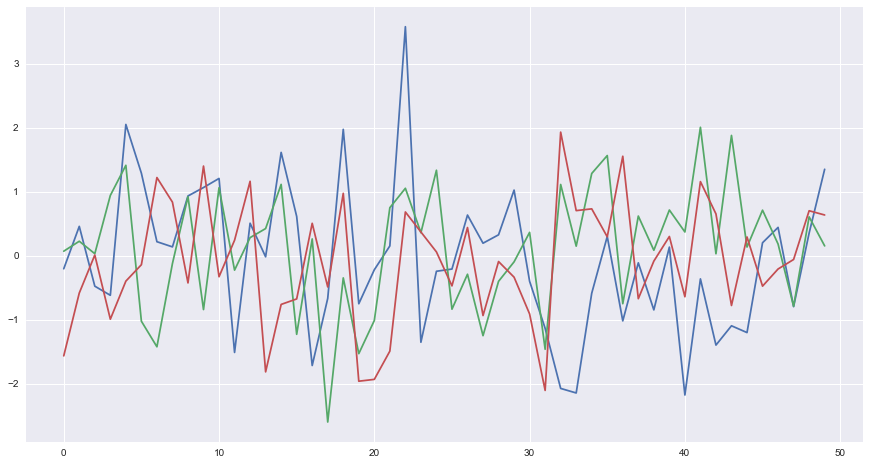

In [52]:
plt.figure(figsize=(15,8))
plt.plot(x,z[0])
plt.plot(x,z[1])
plt.plot(x,z[2])

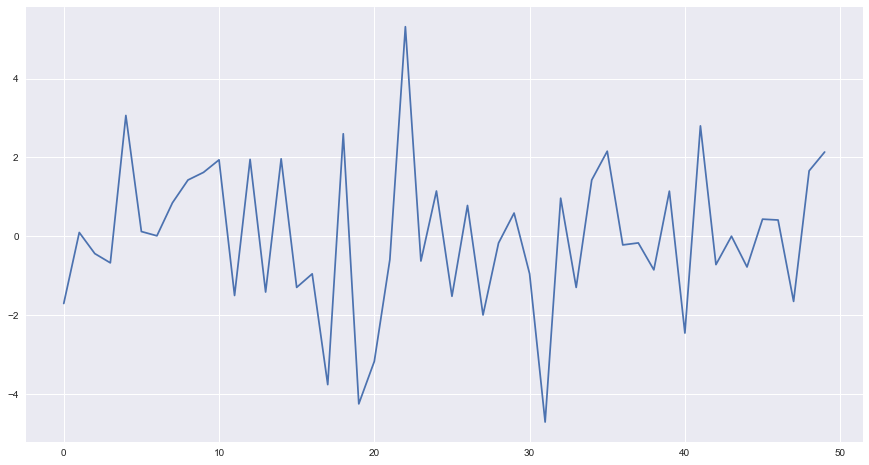

In [53]:
plt.figure(figsize=(15,8))
plt.plot(x, np.sum(z, axis=0))


## General Case:
$$\frac{dx_i(t)}{dt} = -Ax_i + (B-x_i)f(x_i) - x_i (\sum_{j \neq i } f(x_j)) + I_i$$
for $i=1,2,\ldots , n$

## Setup for 3-Neuron System STM 

$$\frac{dx_1(t)}{dt} = -Ax_1 + (B-x_1)f(x_1) - x_1 (f(x_2) + f(x_3) + I_1$$
$$\frac{dx_2(t)}{dt} = -Ax_2 + (B-x_2)f(x_2)  - x_2 (f(x_1) + f(x_3) + I_2$$
$$\frac{dx_3(t)}{dt} = -Ax_3 + (B-x_3)f(x_3)  - x_3 (f(x_1) + f(x_2) + I_3$$
Where $f$ is either Linear, Faster than linear slower than linear, or sigmoid in this example

- $A$ is signal  decay factor 
- $(B-x_i)$  Shunting self-excitation
= $I_i$ is the input signal to neuron $x_i$


In [54]:
def model(x,t, f, I):
    """x is a vector of activations for a cell
    t is time
    f is the function
    I is input/stimulus """
    # unpack state
    x1,x2,x3 = x[0], x[1], x[2] 
    A = 0.5
    B = 2
    dx1dt = -1*A + (B - x1)* f(x1) - x1 * (f(x2) + f(x3)) +I[0][int(t)]
    dx2dt = -1*A + (B - x2)* f(x2) - x2 * (f(x1) + f(x3)) +I[1][int(t)]
    dx3dt = -1*A + (B - x3)* f(x3) - x3 * (f(x2) + f(x1)) +I[2][int(t)]
    
    out = np.array([dx1dt,dx2dt,dx3dt])
    return out

In [37]:
x.shape

(50,)

In [60]:
def simulate_stm(f, title):
    plt.figure(figsize=(15,8))
    x0 = np.zeros(3)
    #t = np.linspace(0,len(z[0])-1)
    t = np.array([i for i in range(len(z[0]))])
    # solve ODE
    y = odeint(model,x0,t, args=(f,z))
    # plot results
    plt.plot(t,y)
    plt.title(title,  fontsize=20)
    plt.xlabel('time', fontsize=20)
    plt.ylabel('$x(t)$', fontsize=20)
    plt.show()

    plt.figure(figsize=(15,8))
    plt.title("Aggregated Signal", fontsize=20)
    plt.plot(t,np.sum(y, axis=1), label='activity')
    plt.plot(x, np.sum(z, axis=0), label = 'signal')
    plt.xlabel('time', fontsize=20)
    plt.ylabel('$\sum_{i=1}^3 x_i(t)$', fontsize=20)
    plt.legend()
    plt.show()

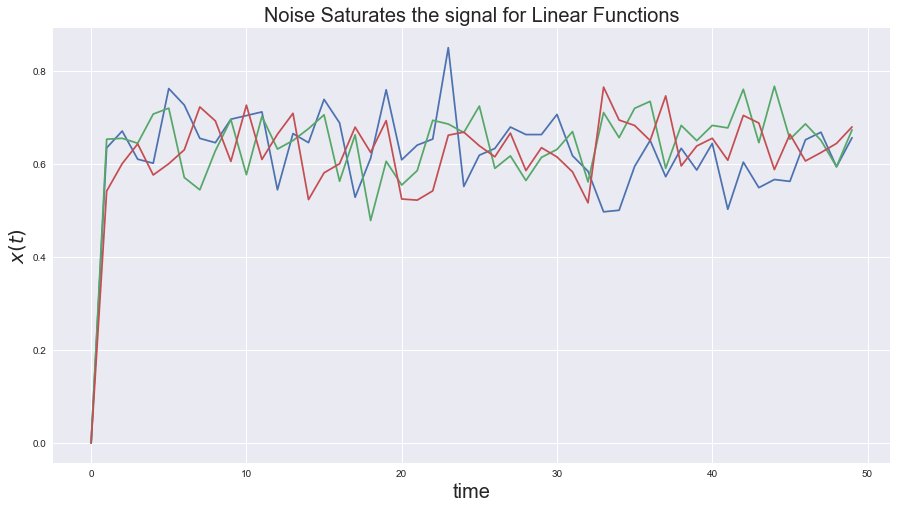

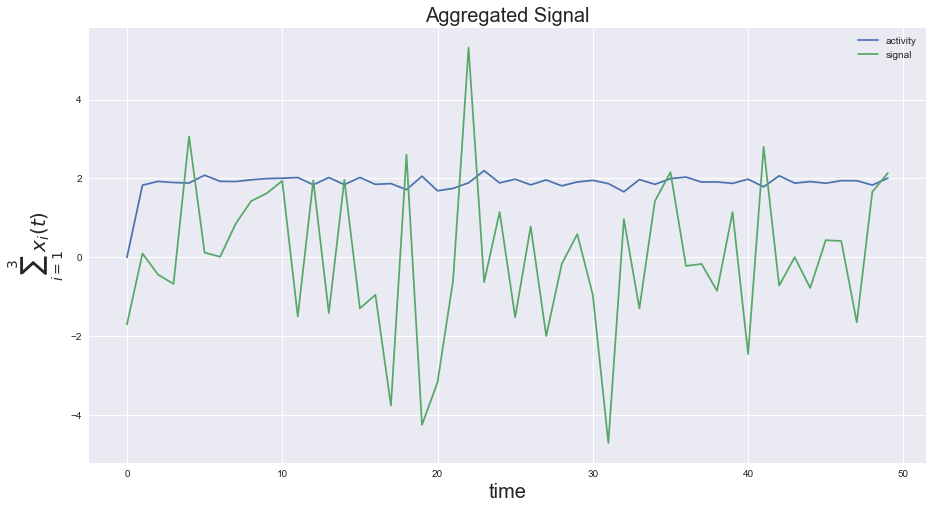

In [61]:
simulate_stm(lin, "Noise Saturates the signal for Linear Functions")

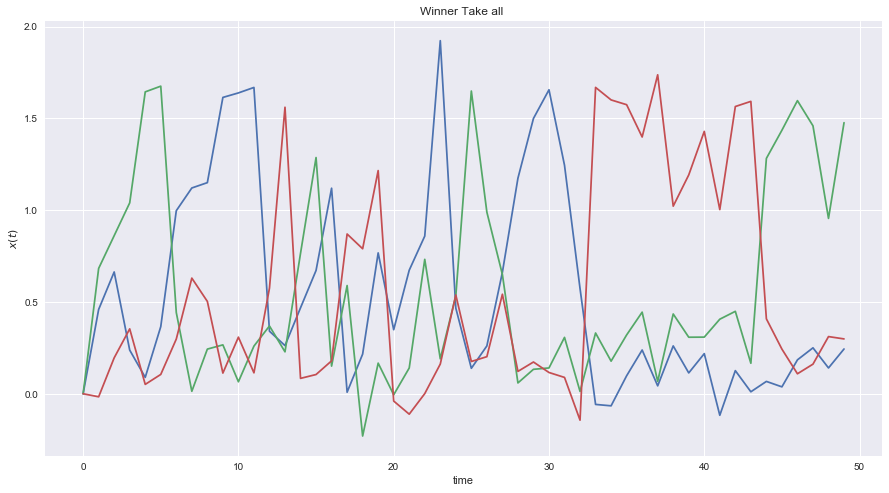

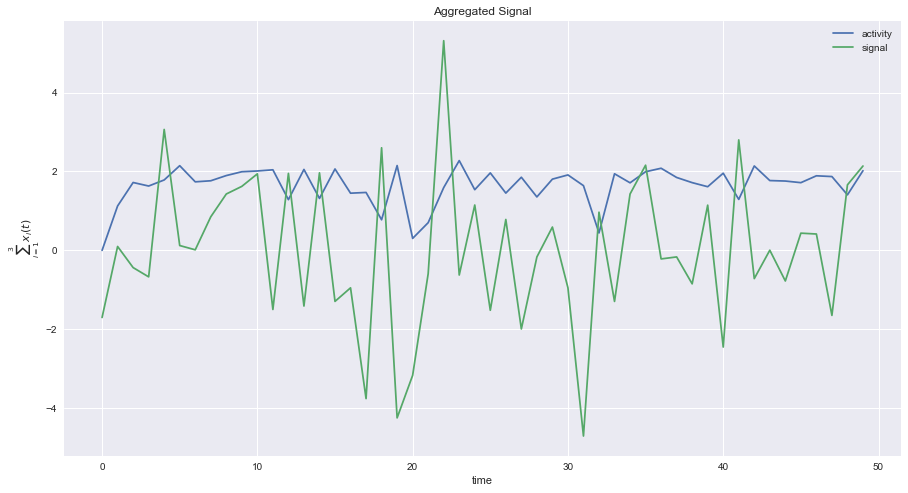

In [40]:
simulate_stm(poly, "Winner Take all ")

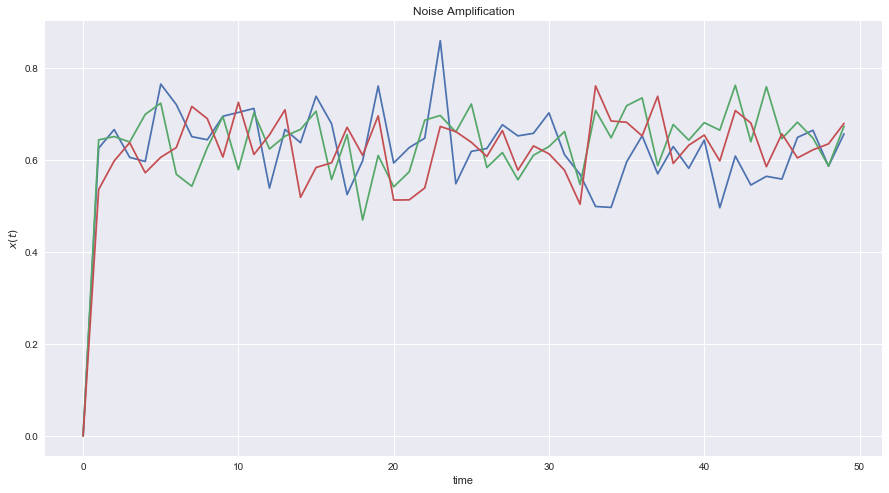

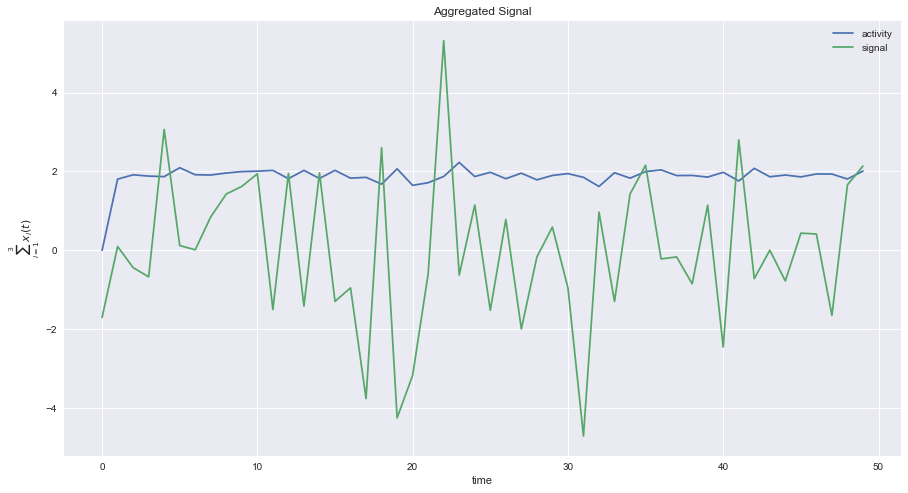

In [41]:
# A siezure? 
simulate_stm(s_lin, "Noise Amplification")

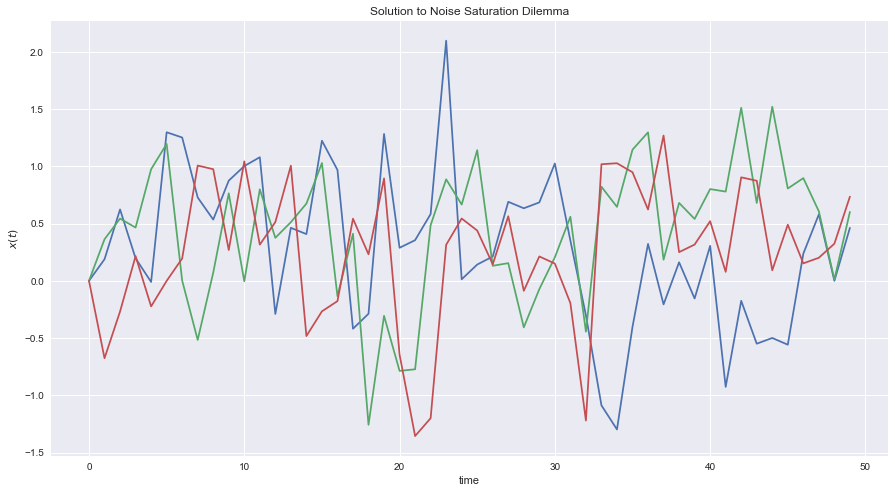

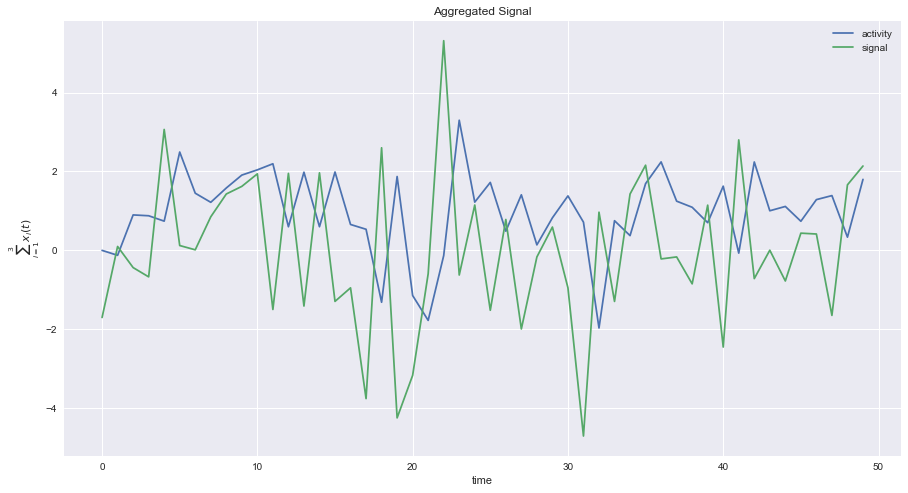

In [42]:
simulate_stm(sigmoid, "Solution to Noise Saturation Dilemma")

# Discussion question: Why doesn't $\sigma(x)$ lead to noise saturation and what can go wrong?
- Take the usual formulation: then for values $x\geq  4 \implies \sigma(x) \approx 1)$
- Can't this lead to an amplification of noise?
    - " $\infty \not\in$ Biology "
        - But then why do people get seizures? 
        - " Any operation that creates enough activity in a population
to exceed its quenching threshold will cause the population activity to be amplified
and maintained in STM." [Grossberg, 1973](url=http://www.cns.bu.edu/Profiles/Grossberg/Gro1973StudiesAppliedMath.pdf)
        - How?
            - Create a sufficiently large signal 
                - (Does this contradict  " $\infty \not\in$ Biology " ?) 
            - Reduce spiking threshold
                - "indirectly increasing noise levels" **how?**
            - Remove inhibitory feedback
                - No blocking of noise. 
        - Are all of these cases just special instances of exceeding the quenching threshold?
            - Looks like it

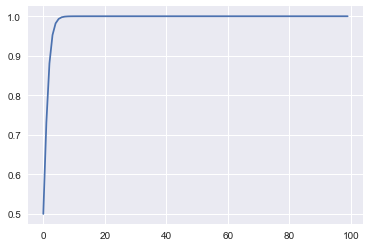

In [43]:
x = np.arange(0,100,1)
y = sigmoid(x)
plt.plot(x,y)


## Reference 
All material for this demo taken from [Grossberg, 1973](url=http://www.cns.bu.edu/Profiles/Grossberg/Gro1973StudiesAppliedMath.pdf)